In [1]:
import requests
from pprint import pprint

url = "http://3.16.67.239:8501"
check_url = f"{url}/v1/models/first_model"
predict_url = f"{url}/v1/models/first_model:predict"

resp = requests.get(check_url)

pprint(resp.json())

def send_call(data: list):
    """
    
    """
    if len(data) != 5:
        print("Length Needs to Be Five")
        raise Exception
        
    resp = requests.post(
        predict_url,
        json={
            "instances": [data]
        }
    )
    if resp.status_code != 200:
        print(f"Status Code: {resp.status_code}")
        print(f"Error with Sent Data")
        raise Exception
    return resp.json()['predictions']

{'model_version_status': [{'state': 'AVAILABLE',
                           'status': {'error_code': 'OK', 'error_message': ''},
                           'version': '1'}]}


In [8]:
data = [2.3, 3.4, 5.3, 2.4, 1.0]

send_call(data)

[[4.12700345e-08, 0.00880355295, 0.00817637239, 0.000181322626, 0.98283869]]

## Question Two

Test the model with the provided function.  Display the results, confusion matrix, and any other method of comparing results of the model and discuss any potential issues with using the model.

In [1]:
!wget https://labs-fannie-data.s3.amazonaws.com/Q2_data.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import urllib
url = r"https://labs-fannie-data.s3.amazonaws.com/Q2_data.json"
urllib.request.urlretrieve(url, r'D:\Grad3\690\final\690-Fall-2019-Final-master\Q2_data.txt')

('D:\\Grad3\\690\\final\\690-Fall-2019-Final-master\\Q2_data.txt',
 <http.client.HTTPMessage at 0x1c88acd5d68>)

In [2]:
import json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## Step 1

First of all, we downloaded the data and read these data into our variables in python and present the true labels.

In [3]:
with open('Q2_data.txt') as json_file:
    input_data = json.load(json_file)

In [4]:
x_true,y_true = [],[]
for key, value in input_data.items():
    for x in value:
        x_true.append(x)
        y_true.append(int(key))

In [5]:
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


## Step 2

We put the data into the prediction modle and get the predicted lables.

In [6]:
y_pred = []
for i in x_true:
    pred = send_call(i)[0]
    y_pred.append(pred.index(max(pred)))

In [7]:
print(y_pred)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


## Step 3

Plot the cofusion matrix and generate other accuracy to assess the model.

In [13]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax,cm

Generate the cofusion matrix and plot it. 

Confusion matrix, without normalization
[[ 0  0  0  0 50]
 [ 0  5  0  4 41]
 [ 0  0  5  0 45]
 [ 0  0  0 18 32]
 [ 0  0  0  0 50]]


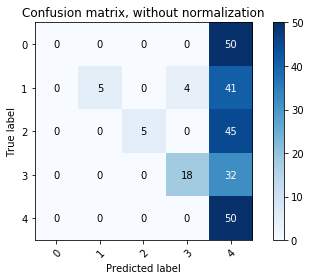

In [14]:
ax,cm= plot_confusion_matrix(y_true, y_pred, classes=np.unique(y_true),
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

In [20]:
print(f"the accuracy is: {np.diag(cm).sum()/cm.sum()}")

the accuracy is: 0.312


As we can see from the results above, the total accuracy is lower than 50% and the confusion matrix seems not ideal. The potnetial issue of this model is that it tends to classify the data into the 4th category. This may be caused by different reasons and one of them may be the lack of training data and another reason may be the model has a very vague descision boundry over different classes.